In [1]:
from sys import audit
import matplotlib
from matplotlib.pyplot import imread
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import seaborn as sns
import time
from tqdm import tqdm


import os
from pathlib import Path
import cv2

In [2]:
class myPCA:
    def __init__(self, no_components):
        self.no_components = no_components

    def fit(self, data):
        self.mean = np.mean(data, axis=0)
        data_centered = data - self.mean
    
        cov = np.cov(data_centered, rowvar=False)
        
        eigen_values, eigen_vectors = np.linalg.eigh(cov)

        idx = np.argsort(eigen_values)[::-1]

        sorted_eigen_values = eigen_values[idx]
        sorted_eigen_vectors = eigen_vectors[:, idx]

        self.components = sorted_eigen_vectors[:, 0:self.no_components]
        self.explained_variance = sorted_eigen_values[:self.no_components]

    def transform(self, data):
        data_centered = data - self.mean

        return np.dot(self.components.T, data_centered.T).T

    def inverse_transform(self, data_transformed):
        return np.dot(data_transformed, self.components.T) + self.mean


In [3]:
def get_data(path):
    annotations_df = pd.read_csv(path + '/task1/train_data/annotations.csv')
    
    y_array = annotations_df['label'].to_numpy()
    images = annotations_df['sample'].to_list()
    
    images_array = []

    for img in tqdm(images):
        
        read_img = cv2.imread(path + '/' + img)
        gray = cv2.cvtColor(read_img, cv2.COLOR_BGR2GRAY)

        images_array.append(gray.flatten())
        
    data_dict = {
        'sample': images_array,
        'label': y_array
    }
        
    dataset = pd.DataFrame(data_dict)
    
    train, test = train_test_split(dataset, test_size=0.2)
    
    return train, test


In [4]:
def build_spaces(train_X, train_y):
    train_X_matrix = []

    tags = list(set(train_y))
    tags = [int(i) for i in tags]
    tags = list(np.sort(np.array(tags)))
    tags = [str(i) for i in tags]


    for tag in tags:
        indices = [i for i, x in enumerate(train_y) if x == tag]
        row = np.array(train_X)[indices]
        train_X_matrix.append(row)

    spaces = []
    
    print("building PCA spaces...")
    for tag in tqdm(train_X_matrix):
        pca = myPCA(200)
        pca.fit(tag)
        spaces.append(pca)
    print("PCA spaces built!")
    return spaces

In [5]:
def predict_spaces(spaces, test_X, test_y):

    reconstruction_errors_2d = []
    print("predicting PCA spaces...")
    for space in tqdm(spaces):
        components = space.transform(test_X)
        reconstructed = space.inverse_transform(components)
        row = []
        for idx, img in enumerate(test_X):
            row.append(abs(np.sum(img - reconstructed[idx])))
        reconstruction_errors_2d.append(np.array(row))

    reconstruction_errors_2d = np.array(reconstruction_errors_2d)

    preds = []
    for idx in range(reconstruction_errors_2d.shape[1]):
        preds.append(np.argmin(reconstruction_errors_2d[:, idx]) + 1)
    
    print("PCA spaces \n")
    print(classification_report(test_y, preds, target_names=[str(i) for i in range(100)]))
    print("Confusion Matrix for PCA spaces: \n", confusion_matrix(test_y, preds))
    ax = sns.heatmap(confusion_matrix(test_y, preds), annot=True, cmap='Blues') 
    ax.set_title('PCA Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    plt.show()

In [6]:
this_file_path = Path(os.path.dirname(os.path.abspath('')) + "/task2") 

print(this_file_path)

D:\facultate\an6_sem1\aait\hw2\task1


In [7]:
train, test = get_data(this_file_path.__str__())

100%|████████████████████████████████████████████████████████████████████████████| 23555/23555 [04:32<00:00, 86.46it/s]


In [8]:
train_X = train['sample'].to_list()
train_y = train['label'].to_list()

test_X = test['sample'].to_list()
test_y = test['label'].to_list()

In [19]:
reduced_data = PCA(n_components=2, svd_solver="randomized").fit_transform(train_X)
kmeans = KMeans(init="k-means++", n_clusters=100, n_init=4)
kmeans.fit(reduced_data)

KMeans(n_clusters=100, n_init=4)

In [ ]:
reduced_data = PCA(n_components=2, svd_solver="randomized").fit_transform(train_X)

In [20]:
train_y[0]

4

In [21]:
dict_labels = {}

for i in range(100):
    dict_labels[str(i)] = {}

for cluster, label in zip(kmeans.labels_, train_y):
    if str(label) in dict_labels[str(cluster)].keys():
        dict_labels[str(cluster)][str(label)] += 1
    else:
        dict_labels[str(cluster)][str(label)] = 1

In [22]:
dict_labels

{'0': {'5': 7,
  '88': 4,
  '4': 8,
  '22': 1,
  '93': 2,
  '72': 6,
  '34': 7,
  '73': 2,
  '17': 8,
  '38': 3,
  '58': 7,
  '30': 2,
  '11': 6,
  '61': 4,
  '29': 6,
  '70': 5,
  '49': 4,
  '15': 6,
  '54': 7,
  '45': 3,
  '26': 6,
  '31': 9,
  '41': 6,
  '78': 4,
  '16': 8,
  '19': 4,
  '28': 6,
  '24': 6,
  '13': 9,
  '77': 9,
  '63': 7,
  '92': 3,
  '81': 2,
  '37': 5,
  '64': 3,
  '86': 2,
  '66': 2,
  '60': 5,
  '21': 4,
  '52': 6,
  '69': 1,
  '6': 3,
  '35': 6,
  '33': 5,
  '67': 6,
  '80': 3,
  '68': 7,
  '56': 6,
  '25': 5,
  '53': 7,
  '7': 8,
  '82': 2,
  '71': 8,
  '91': 6,
  '75': 2,
  '40': 4,
  '90': 4,
  '1': 10,
  '84': 3,
  '94': 2,
  '12': 3,
  '46': 3,
  '32': 8,
  '14': 4,
  '57': 2,
  '59': 5,
  '51': 6,
  '47': 3,
  '3': 3,
  '39': 2,
  '96': 1,
  '50': 3,
  '10': 2,
  '23': 2,
  '0': 2,
  '83': 2,
  '48': 1,
  '85': 2,
  '76': 4,
  '97': 3,
  '79': 4,
  '44': 2,
  '87': 1,
  '36': 1,
  '20': 2,
  '99': 5,
  '89': 2,
  '55': 2,
  '8': 3,
  '95': 3,
  '2': 1,
  

In [29]:
for key in dict_labels.keys():
    dict_items = list(dict_labels[key].items())
    dict_items.sort(key=lambda x: x[1], reverse=True)
    for val in dict_items:
        print(val)
    input("...")
        

('1', 10)
('31', 9)
('13', 9)
('77', 9)
('4', 8)
('17', 8)
('16', 8)
('7', 8)
('71', 8)
('32', 8)
('5', 7)
('34', 7)
('58', 7)
('54', 7)
('63', 7)
('68', 7)
('53', 7)
('72', 6)
('11', 6)
('29', 6)
('15', 6)
('26', 6)
('41', 6)
('28', 6)
('24', 6)
('52', 6)
('35', 6)
('67', 6)
('56', 6)
('91', 6)
('51', 6)
('70', 5)
('37', 5)
('60', 5)
('33', 5)
('25', 5)
('59', 5)
('99', 5)
('88', 4)
('61', 4)
('49', 4)
('78', 4)
('19', 4)
('21', 4)
('40', 4)
('90', 4)
('14', 4)
('76', 4)
('79', 4)
('27', 4)
('74', 4)
('38', 3)
('45', 3)
('92', 3)
('64', 3)
('6', 3)
('80', 3)
('84', 3)
('12', 3)
('46', 3)
('47', 3)
('3', 3)
('50', 3)
('97', 3)
('8', 3)
('95', 3)
('65', 3)
('9', 3)
('62', 3)
('93', 2)
('73', 2)
('30', 2)
('81', 2)
('86', 2)
('66', 2)
('82', 2)
('75', 2)
('94', 2)
('57', 2)
('39', 2)
('10', 2)
('23', 2)
('0', 2)
('83', 2)
('85', 2)
('44', 2)
('20', 2)
('89', 2)
('55', 2)
('18', 2)
('22', 1)
('69', 1)
('96', 1)
('48', 1)
('87', 1)
('36', 1)
('2', 1)
('98', 1)
...
('98', 8)
('23', 7)
('83'

KeyboardInterrupt: Interrupted by user

In [9]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

MemoryError: Unable to allocate 3.05 TiB for an array with shape (551686, 759195) and data type float64

In [ ]:
kmeans.predict()

In [43]:
pca = PCA(n_components=200, svd_solver="randomized")  # we use randomized PCA because the set is huge
pca.fit(train_X)

PCA(n_components=200, svd_solver='randomized')

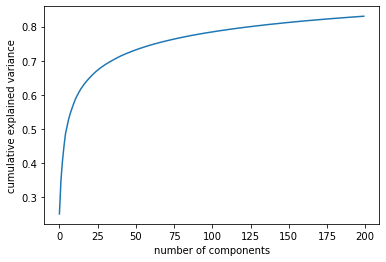

In [44]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [51]:
spaces = build_spaces(train_X, train_y)
predict_spaces(spaces, test_X, test_y)

building PCA spaces...


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]<ipython-input-2-30d5d6cbb406>:9: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov = np.cov(data_centered, rowvar=False)
100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [29:57<00:00, 17.97s/it]


predicting PCA spaces...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:57<00:00,  1.74it/s]

PCA spaces 



ValueError: Mix of label input types (string and number)

predicting PCA spaces...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:42<00:00,  2.35it/s]
c:\users\mihai.petre1208\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mihai.petre1208\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mihai.petre1208\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are

PCA spaces 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.01      1.00      0.02        55
           2       0.00      0.00      0.00        60
           3       0.00      0.00      0.00        56
           4       0.00      0.00      0.00        51
           5       0.00      0.00      0.00        48
           6       0.00      0.00      0.00        53
           7       0.00      0.00      0.00        32
           8       0.00      0.00      0.00        55
           9       0.00      0.00      0.00        59
          10       0.00      0.00      0.00        55
          11       0.00      0.00      0.00        48
          12       0.00      0.00      0.00        61
          13       0.00      0.00      0.00        65
          14       0.00      0.00      0.00        65
          15       0.00      0.00      0.00        48
          16       0.00      0.00      0.00        45
          17  

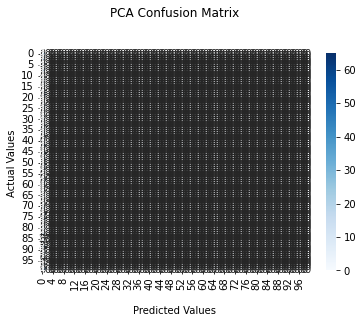

In [57]:
predict_spaces(spaces, test_X, test_y)

In [47]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, Subset

In [175]:
class LeNet5(nn.Module):

    def __init__(self, n_classes):
        super(LeNet5, self).__init__()
        
        self.feature_extractor = nn.Sequential(            
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            nn.Tanh()
        )

        self.classifier = nn.Sequential(
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=n_classes),
        )


    def forward(self, x):
        x = self.feature_extractor(x)
        x = torch.flatten(x)
        x = x.view(-1, x.shape[0])
        print(x.shape)
        logits = self.classifier(x)
        probs = F.softmax(logits, dim=1)
        return logits, probs

In [135]:
def get_accuracy(model, data_loader, device):
    '''
    Function for computing the accuracy of the predictions over the entire data_loader
    '''
    
    correct_pred = 0 
    n = 0
    
    with torch.no_grad():
        model.eval()
        for X, y_true in data_loader:

            X = X.to(device).float()
            y_true = y_true.to(device)

            _, y_prob = model(X)
            _, predicted_labels = torch.max(y_prob, 1)

            n += y_true.size(0)
            correct_pred += (predicted_labels == y_true).sum()

    return correct_pred.float() / n

def plot_losses(train_losses, valid_losses):
    '''
    Function for plotting training and validation losses
    '''
    
    # temporarily change the style of the plots to seaborn 
    plt.style.use('seaborn')

    train_losses = np.array(train_losses) 
    valid_losses = np.array(valid_losses)

    fig, ax = plt.subplots(figsize = (8, 4.5))

    ax.plot(train_losses, color='blue', label='Training loss') 
    ax.plot(valid_losses, color='red', label='Validation loss')
    ax.set(title="Loss over epochs", 
            xlabel='Epoch',
            ylabel='Loss') 
    ax.legend()
    fig.show()
    
    # change the plot style to default
    plt.style.use('default')
    
def train(train_loader, model, criterion, optimizer, device):
    '''
    Function for the training step of the training loop
    '''

    model.train()
    running_loss = 0
    
    for X, y_true in train_loader:

        optimizer.zero_grad()
        
        X = X.to(device).float()
        y_true = y_true.to(device)
    
        # Forward pass
        y_hat, _ = model(X) 
        loss = criterion(y_hat, y_true) 
        running_loss += loss.item() * X.size(0)

        # Backward pass
        loss.backward()
        optimizer.step()
        
    epoch_loss = running_loss / len(train_loader.dataset)
    return model, optimizer, epoch_loss

def validate(valid_loader, model, criterion, device):
    '''
    Function for the validation step of the training loop
    '''
   
    model.eval()
    running_loss = 0
    
    for X, y_true in valid_loader:
    
        X = X.to(device).float()
        y_true = y_true.to(device)

        # Forward pass and record loss
        y_hat, _ = model(X) 
        loss = criterion(y_hat, y_true) 
        running_loss += loss.item() * X.size(0)

    epoch_loss = running_loss / len(valid_loader.dataset)
        
    return model, epoch_loss

def training_loop(model, criterion, optimizer, train_loader, valid_loader, epochs, device, print_every=1):
    '''
    Function defining the entire training loop
    '''
    
    # set objects for storing metrics
    best_loss = 1e10
    train_losses = []
    valid_losses = []
 
    # Train model
    for epoch in range(0, epochs):

        # training
        model, optimizer, train_loss = train(train_loader, model, criterion, optimizer, device)
        train_losses.append(train_loss)

        # validation
        with torch.no_grad():
            model, valid_loss = validate(valid_loader, model, criterion, device)
            valid_losses.append(valid_loss)

        if epoch % print_every == (print_every - 1):
            
            train_acc = get_accuracy(model, train_loader, device=device)
            valid_acc = get_accuracy(model, valid_loader, device=device)
                
            print(f'{datetime.now().time().replace(microsecond=0)} --- '
                  f'Epoch: {epoch}\t'
                  f'Train loss: {train_loss:.4f}\t'
                  f'Valid loss: {valid_loss:.4f}\t'
                  f'Train accuracy: {100 * train_acc:.2f}\t'
                  f'Valid accuracy: {100 * valid_acc:.2f}')

    plot_losses(train_losses, valid_losses)
    
    return model, optimizer, (train_losses, valid_losses)

In [159]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)['label']
        self.img_paths = pd.read_csv(annotations_file)['sample']
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_paths.iloc[idx])
#         print(img_path)
        image = cv2.imread(img_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
#         scale_percent = 50 # percent of original size
#         width = int(image.shape[1] * scale_percent / 100)
#         height = int(image.shape[0] * scale_percent / 100)
#         dim = (width, height)
#         image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
#         print(gray.shape)
        image = np.reshape(gray, (1, 64, 64))
        label = self.img_labels.iloc[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [160]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [161]:
images_path = this_file_path.__str__() + "/"
labels_path = this_file_path.__str__() + "/task1/train_data/annotations.csv"

In [162]:
train_set = CustomImageDataset(labels_path, images_path)

In [163]:
def train_val_dataset(dataset, val_split=0.25):
    train_idx, val_idx = train_test_split(list(range(len(dataset))), test_size=val_split)
    datasets = {}
    datasets['train'] = Subset(dataset, train_idx)
    datasets['val'] = Subset(dataset, val_idx)
    return datasets

In [164]:
datasets = train_val_dataset(train_set)

In [165]:
train_set = datasets['train']
val_set = datasets['val']

In [166]:
train_loader = DataLoader(dataset=train_set, 
                          batch_size=2, 
                          shuffle=True)

valid_loader = DataLoader(dataset=val_set, 
                          batch_size=2, 
                          shuffle=False)

In [177]:
torch.manual_seed(100)

model = LeNet5(100).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [178]:
model, optimizer, _ = training_loop(model, criterion, optimizer, train_loader, valid_loader, 5, DEVICE)

torch.Size([1, 19440])


RuntimeError: mat1 dim 1 must match mat2 dim 0